**IMPORTING LIBRARIES**

In [47]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from imutils import paths
import seaborn as sns
import random
import time
from datetime import datetime
import sklearn
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import os 
from sklearn.metrics import confusion_matrix, classification_report


**Importing necessary directories**

    The dataset contains 16012 images of 10 label, each label has been assigned a unique interger for the creation of models.


In [48]:
directories = {
    "Tomato__Target_Spot": 0,
    "Tomato__Tomato_mosaic_virus": 1,
    "Tomato__Tomato_YellowLeaf__Curl_Virus": 2,
    "Tomato_Bacterial_spot": 3,
    "Tomato_Early_blight": 4,
    "Tomato_healthy": 5,
    "Tomato_Late_blight": 6,
    "Tomato_Leaf_Mold": 7,
    "Tomato_Septoria_leaf_spot": 8,
    "Tomato_Spider_mites_Two_spotted_spider_mite": 9
}


**IMAGE PREPROCESSING & SPLITTING**


This process is part of the data preprocessing step, which is a building step in the creation of image segmentation model. The images have been subjected to grayscale conversion, histogram equalization, normalization of pixels and the resizing of image to 32x32 pixels.

The training and testings lists are initialized as empty containers, and during subsequent steps in our code, we will populate them with actual image data and their corresponding labels. 

The images are split into training(80% of images) and testing(20% of images) datasets. These datasets will be used in the CNN model.

In [49]:
train_images = []
train_labels = []
test_images = []
test_labels = []

for directory, label in directories.items():
    # Convert relative path to absolute path
    absolute_directory = os.path.abspath(directory)
    images = []
    
    try:
        for filename in os.listdir(absolute_directory):
            if filename.endswith('.JPG') or filename.endswith('.png'):
                filepath = os.path.join(absolute_directory, filename)
                image = cv2.imread(filepath)
                
                if image is not None:
                    # Convert the image to grayscale
                    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

                    # Apply histogram equalization if the image is in grayscale format
                    if len(image.shape) == 2:
                        image = cv2.equalizeHist(image)

                    # Normalize the pixel values to be between 0 and 1
                    image = image / 255.0

                    # Resize the image to 32x32
                    image = cv2.resize(image, (32, 32))

                    # Append the image to the list of images for this directory
                    images.append(image)
                else:
                    print(f"Warning: Failed to load image {filepath}")
    
    except FileNotFoundError:
        print(f"Directory not found: {absolute_directory}")
    except Exception as e:
        print(f"An error occurred: {e}")

    # Split the images into train and test sets
    if images:  # Ensure that there are images to split
        train_images_dir, test_images_dir, train_labels_dir, test_labels_dir = train_test_split(
            images, [label] * len(images), test_size=0.2, random_state=0
        )

        # Append the images and labels to the overall train and test sets
        train_images += train_images_dir
        test_images += test_images_dir
        train_labels += train_labels_dir
        test_labels += test_labels_dir


train_images = np.array(train_images)
test_images = np.array(test_images)
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)


Images are transformed into numpy arrays because TensorFlow, the framework employed for constructing the CNN model, relies on numpy arrays as the input data format. This conversion allows for seamless integration of image data into the TensorFlow pipeline, facilitating data preprocessing and model training.

In [50]:
# Convert the lists to numpy arrays
train_images = np.array(train_images).astype('float32')
train_labels = np.array(train_labels).astype('int')
test_images = np.array(test_images).astype('float32')
test_labels = np.array(test_labels).astype('int')



print(f"Training data: {len(train_images)} images")
print(f"Testing data: {len(test_images)} images")

Training data: 12681 images
Testing data: 3176 images


**BAR GRAPH**

This graph plots the count of images of in each label, thus helping us understand the dataset better.

C:\Users\noelm\AppData\Local\Temp\ipykernel_16964\1952017039.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=image_counts_list, palette='viridis')


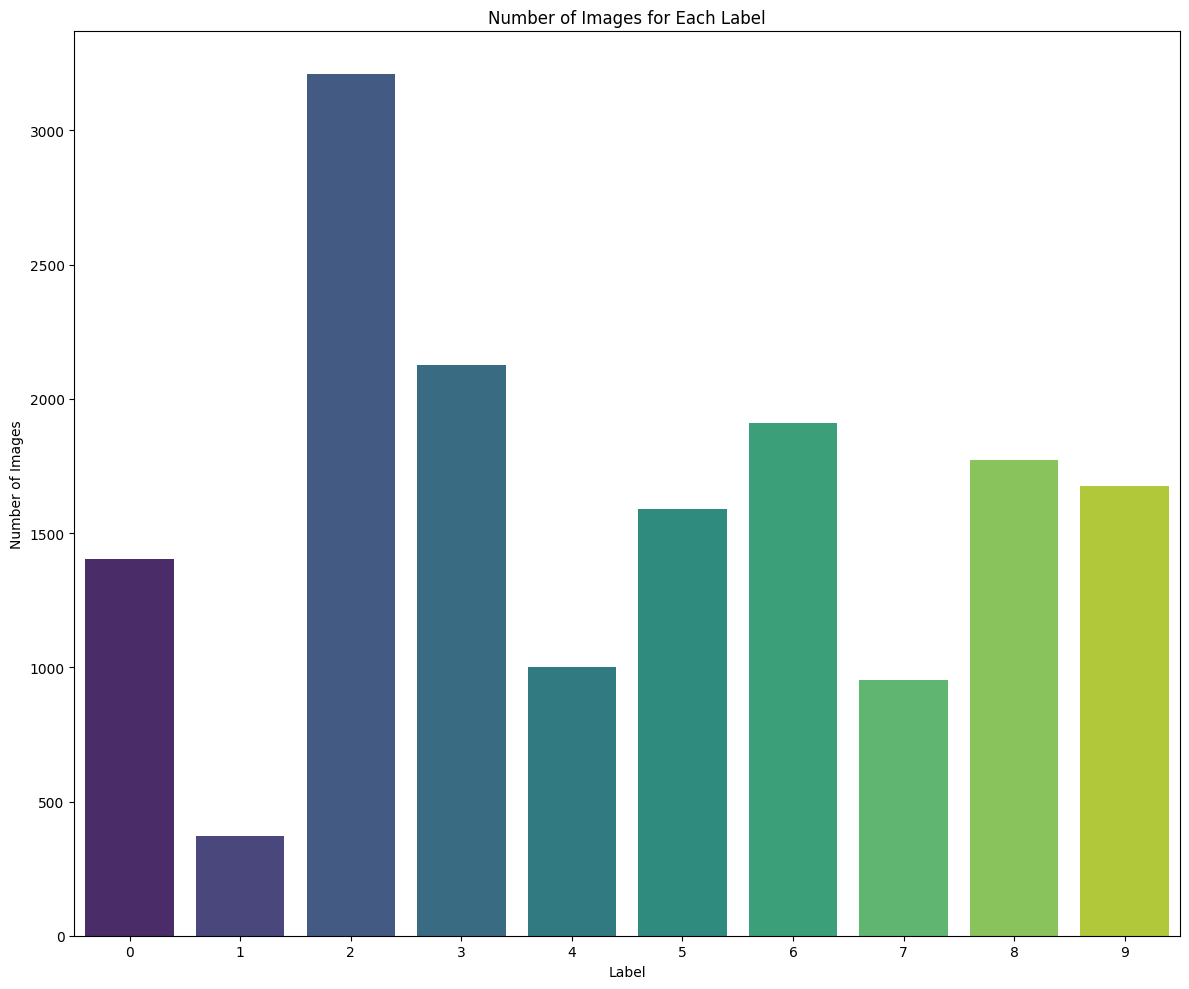

In [51]:

# Initialize a dictionary to store image counts for each folder
image_counts = {}

# Loop through each folder and count the number of images
for folder_name, label in directories.items():
    # Assume you have the images in subfolders of the current directory
    folder_path = os.path.join(folder_name)
    image_count = len(os.listdir(folder_path))
    image_counts[label] = image_count

# Extract labels and their corresponding image counts
labels = list(directories.values())
image_counts_list = list(image_counts.values())

# Create a bar graph using Seaborn with the Viridis colormap
plt.figure(figsize=(12, 10))
sns.barplot(x=labels, y=image_counts_list, palette='viridis')
plt.xlabel('Label')
plt.ylabel('Number of Images')
plt.title('Number of Images for Each Label')
plt.tight_layout()

# Display the bar graph
plt.show()

This snippet converts the images to grayscale and displays the images with thier label names 

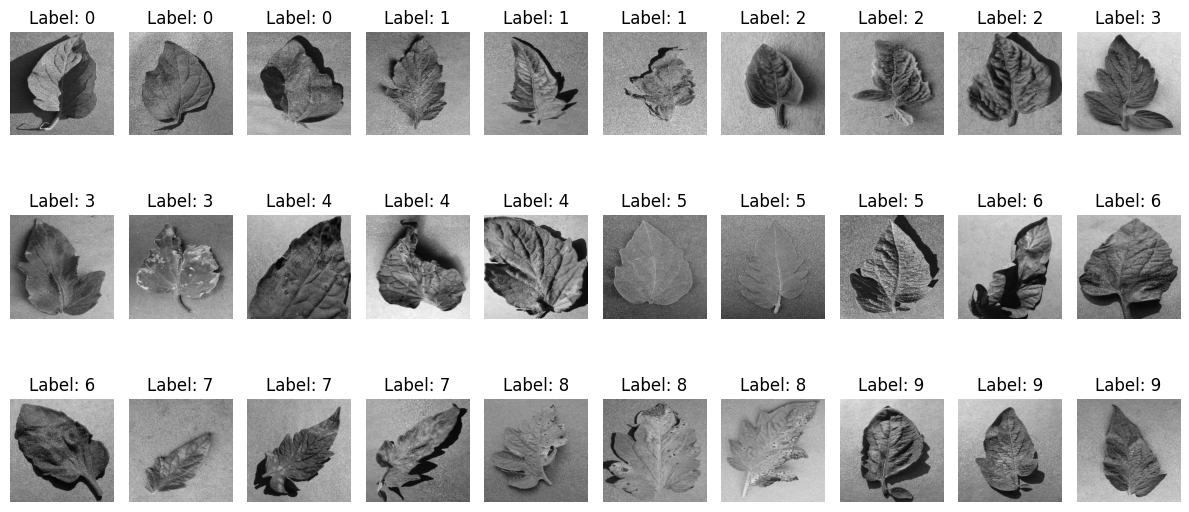

In [52]:


# Initialize lists to store the images and labels
images_to_print = []
labels_to_print = []

# Define the number of images to print per class
num_images_to_print = 3

# Loop through the directories and load images
for directory, label in directories.items():
    images = []
    for filename in os.listdir(directory):
        if filename.endswith('.JPG') or filename.endswith('.png'):
            # Load the image
            filepath = os.path.join(directory, filename)
            image = cv2.imread(filepath)

            # Convert the image to grayscale
            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

            # Append the image and label to the lists
            images.append(image)
            labels_to_print.append(label)

            # Break if the desired number of images to print is reached
            if len(images) == num_images_to_print:
                break

    # Append the images to the overall list
    images_to_print.extend(images)

# Convert the lists to numpy arrays
images_to_print = np.array(images_to_print)
labels_to_print = np.array(labels_to_print)

# Display the images
plt.figure(figsize=(12, 6))
for i in range(len(images_to_print)):
    plt.subplot(num_images_to_print, len(directories), i + 1)
    plt.imshow(images_to_print[i], cmap='gray')
    plt.title(f"Label: {labels_to_print[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


### **CNN**

The model reshaps the input image data into a format compatible with the CNN architecture, with each image now having dimensions of 32x32 pixels and a single channel (grayscale). The model architecture consists of multiple layers: convolutional layers followed by max-pooling layers to extract features, dropout layers for regularization, and fully connected (Dense) layers for classification.

The model is configured with a softmax activation function in the output layer for multi-class classification, where it predicts one of ten possible classes.It is compiled with the Adam optimizer and sparse categorical cross-entropy loss function.

The model is trained using the training data (train_images and train_labels) for 40 epochs, and the training progress is monitored, including accuracy, through the history variable.

In [53]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Reshape the images for use in a convolutional neural network
train_images = train_images.reshape(-1, 32, 32, 1)
test_images = test_images.reshape(-1, 32, 32, 1)

# Define the model architecture with additional layers and padding
CNN_model = tf.keras.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1), padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
CNN_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = CNN_model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))


c:\Users\noelm\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
397/397 ━━━━━━━━━━━━━━━━━━━━ 37s 82ms/step - accuracy: 0.1857 - loss: 2.2174 - val_accuracy: 0.3007 - val_loss: 1.9408
Epoch 2/10
397/397 ━━━━━━━━━━━━━━━━━━━━ 37s 93ms/step - accuracy: 0.3549 - loss: 1.8208 - val_accuracy: 0.4688 - val_loss: 1.5530
Epoch 3/10
397/397 ━━━━━━━━━━━━━━━━━━━━ 36s 90ms/step - accuracy: 0.4842 - loss: 1.5077 - val_accuracy: 0.5582 - val_loss: 1.2599
Epoch 4/10
397/397 ━━━━━━━━━━━━━━━━━━━━ 33s 82ms/step - accuracy: 0.5403 - loss: 1.3077 - val_accuracy: 0.6080 - val_loss: 1.1361
Epoch 5/10
397/397 ━━━━━━━━━━━━━━━━━━━━ 36s 90ms/step - accuracy: 0.5979 - loss: 1.1799 - val_accuracy: 0.6152 - val_loss: 1.1025
Epoch 6/10
397/397 ━━━━━━━━━━━━━━━━━━━━ 32s 81ms/step - accuracy: 0.6085 - loss: 1.1221 - val_accuracy: 0.6360 - val_loss: 1.0388
Epoch 7/10
397/397 ━━━━━━━━━━━━━━━━━━━━ 30s 75ms/step - accuracy: 0.6362 - loss: 1.0670 - val_accuracy: 0.6776 - val_loss: 0.9522
Epoch 8/10
397/397 ━━━━━━━━━━━━━━━━━━━━ 29s 74ms/step - accuracy: 0.6497 - loss: 0.9912 - 

In [54]:
# Evaluate the model on the test data
test_loss, test_acc = CNN_model.evaluate(test_images, test_labels)

# Print the overall accuracy of the model on the test data
print('Test accuracy:', test_acc)


100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.6752 - loss: 0.9170
Test accuracy: 0.6848236918449402


The model accuracy stands at 78.494% after 40 epochs. The accuracy being average can be attributed to the large dataset and it's complexity.  

100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step


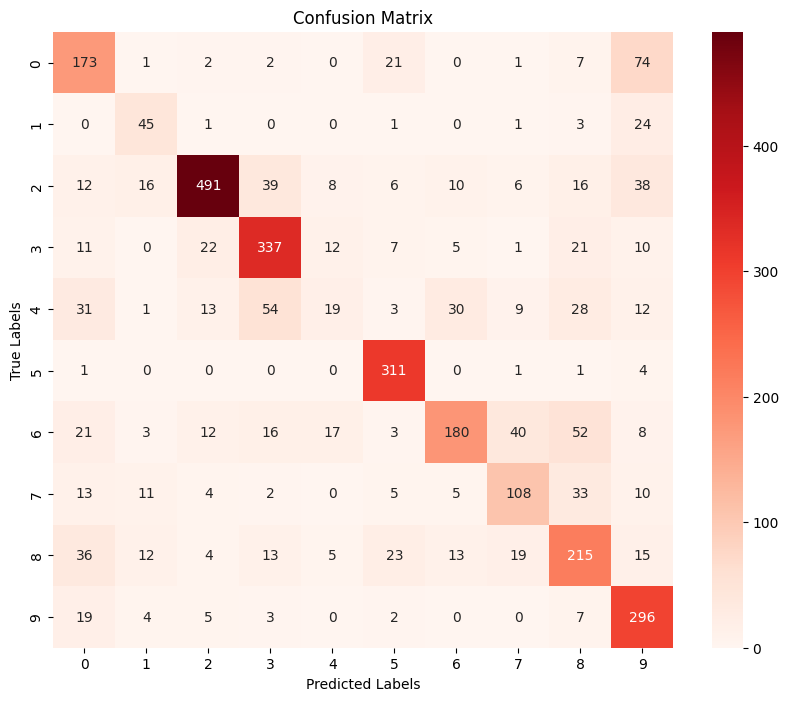

In [55]:

# Predict the test labels
predicted_labels = CNN_model.predict(test_images)
predicted_labels = np.argmax(predicted_labels, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(test_labels, predicted_labels)

# Create a heatmap for the confusion matrix using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Print a detailed classification report
report = classification_report(test_labels, predicted_labels, target_names=[str(i) for i in range(10)])


### **ReS Net50**
 

In [56]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Dropout, Add, Input
from tensorflow.keras.models import Model

def residual_block(x, filters, kernel_size=(3, 3), padding='same', strides=(1, 1)):
    # Shortcut path
    shortcut = x
    if strides != (1, 1):
        shortcut = Conv2D(filters, (1, 1), padding='same', strides=strides)(shortcut)  # Match the shortcut to the residual path
    
    # Residual path
    x = Conv2D(filters, kernel_size, activation='relu', padding=padding, strides=strides)(x)
    x = Conv2D(filters, kernel_size, activation=None, padding=padding)(x)
    
    # Add the shortcut to the residual path
    x = Add()([x, shortcut])
    x = tf.keras.layers.Activation('relu')(x)
    
    return x

def create_resnet_model(input_shape, num_classes):
    inputs = Input(shape=input_shape)
    
    # Initial Conv2D layer
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    x = Dropout(0.25)(x)
    
    # Residual blocks with strides for downsampling
    x = residual_block(x, 32)
    x = residual_block(x, 64, strides=(2, 2))
    x = residual_block(x, 128, strides=(2, 2))
    x = residual_block(x, 256, strides=(2, 2))
    x = residual_block(x, 512, strides=(2, 2))
    
    x = Flatten()(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    outputs = Dense(num_classes, activation='softmax')(x)
    
    model = Model(inputs=inputs, outputs=outputs)
    
    return model

# Define input shape and number of classes
input_shape = (32, 32, 1)
num_classes = 10

# Create the ResNet model
model = create_resnet_model(input_shape, num_classes)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))


Epoch 1/10
397/397 ━━━━━━━━━━━━━━━━━━━━ 99s 229ms/step - accuracy: 0.2168 - loss: 2.1785 - val_accuracy: 0.4232 - val_loss: 1.7393
Epoch 2/10
397/397 ━━━━━━━━━━━━━━━━━━━━ 112s 283ms/step - accuracy: 0.4424 - loss: 1.6378 - val_accuracy: 0.5435 - val_loss: 1.3154
Epoch 3/10
397/397 ━━━━━━━━━━━━━━━━━━━━ 132s 332ms/step - accuracy: 0.5568 - loss: 1.3149 - val_accuracy: 0.5579 - val_loss: 1.2857
Epoch 4/10
397/397 ━━━━━━━━━━━━━━━━━━━━ 104s 263ms/step - accuracy: 0.6040 - loss: 1.1563 - val_accuracy: 0.6036 - val_loss: 1.1754
Epoch 5/10
397/397 ━━━━━━━━━━━━━━━━━━━━ 85s 215ms/step - accuracy: 0.6493 - loss: 1.0239 - val_accuracy: 0.6357 - val_loss: 1.0687
Epoch 6/10
397/397 ━━━━━━━━━━━━━━━━━━━━ 88s 221ms/step - accuracy: 0.6981 - loss: 0.9067 - val_accuracy: 0.6609 - val_loss: 0.9793
Epoch 7/10
138/397 ━━━━━━━━━━━━━━━━━━━━ 4:07:43 57s/step - accuracy: 0.7272 - loss: 0.7974

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Dropout, Add, Input
from tensorflow.keras.models import Model

def residual_block(x, filters, kernel_size=(3, 3), padding='same', strides=(1, 1)):
    # Shortcut path
    shortcut = x
    if strides != (1, 1):
        shortcut = Conv2D(filters, (1, 1), padding='same', strides=strides)(shortcut)  # Match the shortcut to the residual path
    
    # Residual path
    x = Conv2D(filters, kernel_size, activation='relu', padding=padding, strides=strides)(x)
    x = Conv2D(filters, kernel_size, activation=None, padding=padding)(x)
    
    # Add the shortcut to the residual path
    x = Add()([x, shortcut])
    x = tf.keras.layers.Activation('relu')(x)
    
    return x

def create_resnet_model(input_shape, num_classes):
    inputs = Input(shape=input_shape)
    
    # Initial Conv2D layer
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    x = Dropout(0.25)(x)
    
    # Residual blocks with strides for downsampling
    x = residual_block(x, 32)
    x = residual_block(x, 64, strides=(2, 2))
    x = residual_block(x, 128, strides=(2, 2))
    x = residual_block(x, 256, strides=(2, 2))
    x = residual_block(x, 512, strides=(2, 2))
    
    x = Flatten()(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    outputs = Dense(num_classes, activation='softmax')(x)
    
    model = Model(inputs=inputs, outputs=outputs)
    
    return model

# # Define input shape and number of classes
# input_shape = (32, 32, 1)
# num_classes = 10

# # Create the ResNet model
# model = create_resnet_model(input_shape, num_classes)

# # Compile the model
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

# # Train the model
# history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 1, 1, 32)       │       147,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 0, 0, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 0, 0, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 0, 0, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 0, 0, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 0, 0, 64)       │             

 Total params: 15,154,474 (57.81 MB)

 Trainable params: 15,154,474 (57.81 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_images, test_labels)

# Print the overall accuracy of the model on the test data
print('Test accuracy:', test_acc)



100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 102ms/step - accuracy: 0.6718 - loss: 1.1353
Test accuracy: 0.6608942151069641


100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step


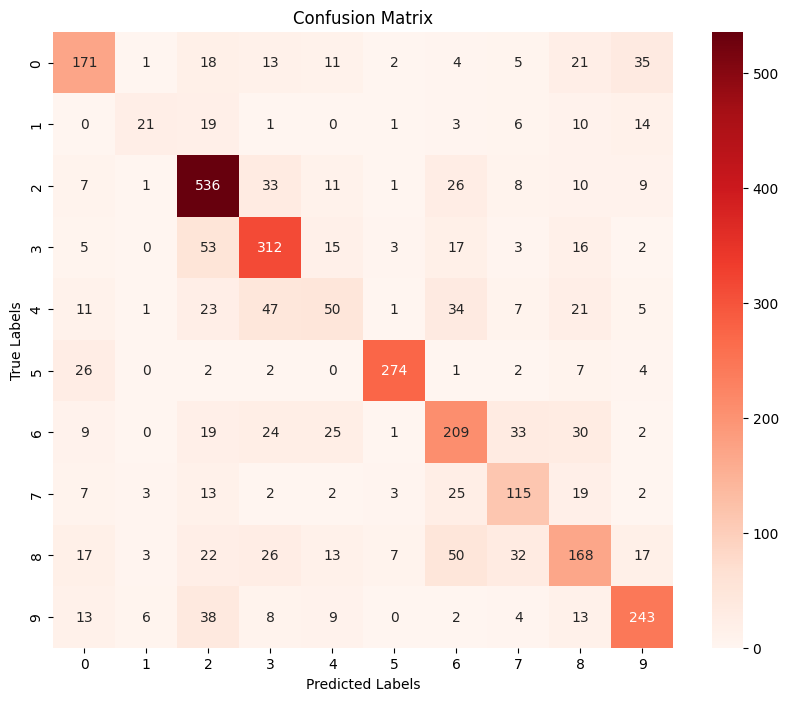

In [ ]:

# Predict the test labels
predicted_labels = model.predict(test_images)
predicted_labels = np.argmax(predicted_labels, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(test_labels, predicted_labels)

# Create a heatmap for the confusion matrix using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Print a detailed classification report
report = classification_report(test_labels, predicted_labels, target_names=[str(i) for i in range(10)])


### **VGGNet Model**

In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical


# Data preparation
def load_and_preprocess_images(directories):
    train_images = []
    train_labels = []
    test_images = []
    test_labels = []

    for directory, label in directories.items():
        absolute_directory = os.path.abspath(directory)
        images = []

        try:
            for filename in os.listdir(absolute_directory):
                if filename.endswith('.JPG') or filename.endswith('.png'):
                    filepath = os.path.join(absolute_directory, filename)
                    image = cv2.imread(filepath)

                    if image is not None:
                        # Resize the image to 64x64
                        image = cv2.resize(image, (64, 64))

                        # Normalize the pixel values to be between 0 and 1
                        image = image / 255.0

                        # Append the image to the list
                        images.append(image)
                    else:
                        print(f"Warning: Failed to load image {filepath}")

        except FileNotFoundError:
            print(f"Directory not found: {absolute_directory}")
        except Exception as e:
            print(f"An error occurred: {e}")

        # Ensure there are images to split
        if images:
            # Split the images and labels into train and test sets
            train_images_dir, test_images_dir, train_labels_dir, test_labels_dir = train_test_split(
                images, [label] * len(images), test_size=0.2, random_state=0
            )

            # Append the results to the overall lists
            train_images.extend(train_images_dir)
            test_images.extend(test_images_dir)
            train_labels.extend(train_labels_dir)
            test_labels.extend(test_labels_dir)

    # Convert lists to numpy arrays
    train_images = np.array(train_images)
    test_images = np.array(test_images)
    train_labels = np.array(train_labels)
    test_labels = np.array(test_labels)

    # Ensure labels are in categorical format
    num_classes = len(directories)  # Adjust according to your number of classes
    train_labels = to_categorical(train_labels, num_classes=num_classes)
    test_labels = to_categorical(test_labels, num_classes=num_classes)

    return train_images, test_images, train_labels, test_labels

train_images, test_images, train_labels, test_labels = load_and_preprocess_images(directories)

# Check the shape of train_images and test_images
print(f"Train Images Shape: {train_images.shape}")
print(f"Test Images Shape: {test_images.shape}")


Train Images Shape: (12681, 64, 64, 3)
Test Images Shape: (3176, 64, 64, 3)


In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models

def build_vgg16_model(input_shape, num_classes):
    # Load the VGG16 model without the top layers and with custom input shape
    base_model = VGG16(weights=None, include_top=False, input_shape=input_shape)
    base_model.trainable = False  # Freeze the base model layers

    model = models.Sequential([
        # Note: VGG16 expects 3-channel inputs, so use Conv2D to convert grayscale to 3 channels
        layers.Conv2D(3, (3, 3), padding='same', input_shape=input_shape), 
        layers.Activation('relu'),
        base_model,
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')  # Use softmax for multi-class classification
    ])

    return model

input_shape = (64, 64, 3)  # Adjust input shape to match image size and channels (3 for RGB)
num_classes = len(directories)  # Adjust according to your number of classes
vgg16_model = build_vgg16_model(input_shape, num_classes)

# Compile the model
vgg16_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
vgg16_model.summary()


c:\Users\noelm\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_27 (Conv2D)              │ (None, 64, 64, 3)      │            84 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg16 (Functional)              │ (None, 2, 2, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_39 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,768,990 (60.15 MB)

 Trainable params: 1,054,302 (4.02 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Fit the model
vgg16_model.fit(
    datagen.flow(train_images, train_labels, batch_size=32),
    epochs=10,
    validation_data=(test_images, test_labels)
)


Epoch 1/10


c:\Users\noelm\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


397/397 ━━━━━━━━━━━━━━━━━━━━ 397s 991ms/step - accuracy: 0.1883 - loss: 2.2299 - val_accuracy: 0.2021 - val_loss: 2.1355
Epoch 2/10
397/397 ━━━━━━━━━━━━━━━━━━━━ 424s 1s/step - accuracy: 0.2393 - loss: 2.0672 - val_accuracy: 0.2746 - val_loss: 1.9505
Epoch 3/10
397/397 ━━━━━━━━━━━━━━━━━━━━ 420s 1s/step - accuracy: 0.2673 - loss: 1.9491 - val_accuracy: 0.2815 - val_loss: 1.9071
Epoch 4/10
397/397 ━━━━━━━━━━━━━━━━━━━━ 378s 951ms/step - accuracy: 0.2784 - loss: 1.9111 - val_accuracy: 0.2862 - val_loss: 1.8892
Epoch 5/10
397/397 ━━━━━━━━━━━━━━━━━━━━ 1066s 3s/step - accuracy: 0.2964 - loss: 1.8773 - val_accuracy: 0.3042 - val_loss: 1.8633
Epoch 6/10
397/397 ━━━━━━━━━━━━━━━━━━━━ 600s 2s/step - accuracy: 0.3076 - loss: 1.8689 - val_accuracy: 0.3064 - val_loss: 1.8561
Epoch 7/10
137/397 ━━━━━━━━━━━━━━━━━━━━ 6:33 2s/step - accuracy: 0.3197 - loss: 1.8333

KeyboardInterrupt: 

**VISUALIZING THE PREDICTIONS**

  1/100 [..............................] - ETA: 4s

100/100 [==============================] - 1s 11ms/step


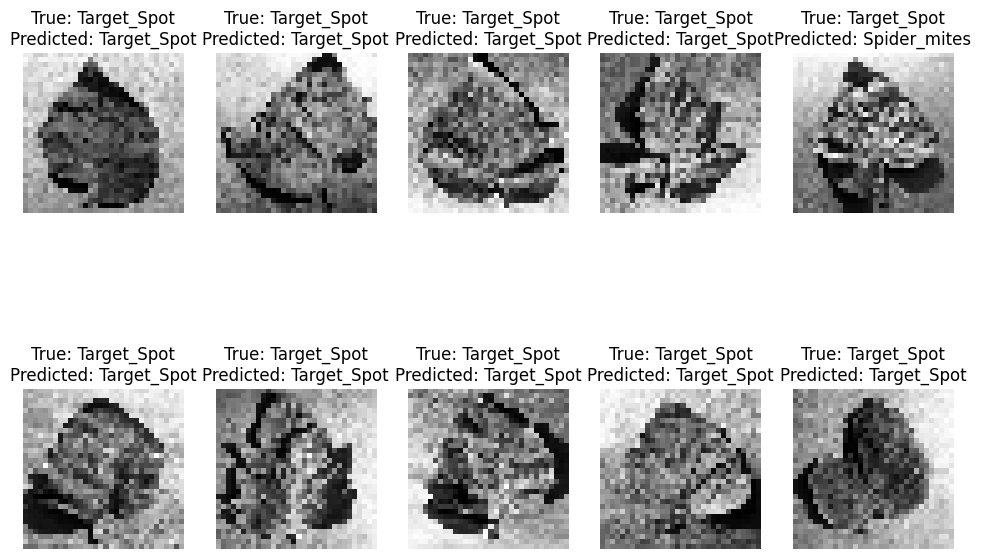

In [ ]:
# Make predictions on the test images
predicted_labels = model.predict(test_images)

# Convert predicted labels to class indices
predicted_classes = np.argmax(predicted_labels, axis=1)
import matplotlib.pyplot as plt

# Define a function to plot MRI images with their true and predicted labels
def plot_images(images, true_labels, predicted_labels, class_names):
    plt.figure(figsize=(12, 8))
    for i in range(10):  # Adjust the number of images to display as needed
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i].reshape(32, 32), cmap='gray')
        plt.title(f'True: {class_names[true_labels[i]]}\nPredicted: {class_names[predicted_labels[i]]}')
        plt.axis('off')

# Define class names for your dataset (adjust as needed)
class_names = [
    "Target_Spot",
    "Tomato_mosaic_virus",
    "Tomato_YellowLeaf__Curl_Virus",
    "Bacterial_spot",
    "Early_blight",
    "healthy",
    "Late_blight",
    "Leaf_Mold",
    "Septoria_leaf_spot",
    "Spider_mites"
]

# Plot a few MRI images with their true and predicted labels
plot_images(test_images, test_labels, predicted_classes, class_names)
plt.show()

